# Taylor series and approximations

Taylor series is one the best tools maths has to offer for approximating functions. Taylor series is about taking non-polynomial functions (say f(x)) and finding polyomials (P(x)) that approximate at some input. The motive here is the polynomials tend to be much easier to deal with than other functions, they are easier to compute, take derivatives, integrate, just easier overall.

$$
P(x) = f(a) + \frac{df(a)}{dx}\frac{(x-a)^1}{1!} + \frac{d^2f(a)}{dx^2}\frac{(x-a)^2}{2!} + \cdots
$$

Tayelor series is used to find a solution of a nonlinear equation as shown later on (called the Newton Raphson method).

## Potential energy of a simple pendulum


To determine the potential energy of a pendulum, for that we need an expression for how high the weight of the pendulum is above its lowest point. This works out to be  $h = R(1 - \cos(\theta))$ The cosine function made the problem awkward and unweildy. 

![Pendulum](Pendulum.png)

But, we can approximate the cosine function as follow using Taylor series by making a=0 in the above equation.

$\cos(\theta) \approx cos(0) + cos'(0)\theta + cos"(0)\frac{\theta^2}{2} = cos(0) - sin(0)\theta - cos(0)\frac{\theta^2}{2}$

$\cos(\theta) \approx 1 - \frac{\theta^2}{2}$

 everything just fell into place much more easily. An approximation like that might seem completely out of left field. If we graph these functions, they do look close to each other for small angles.
 
$h = R(1 - \cos(\theta)) \approx R\frac{\theta^2}{2}$


In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

x = np.arange(-3,3.1,0.1)   # start,stop,step

# True solution
y = 1-np.cos(x)

# Taylor series (1st order) approximation
z = [i**2/2 for i in x]

# Plotting
plt.plot(x, y)
plt.plot(x, z)
plt.xlim([-3, 3])
plt.ylim([0, 3])

(0, 3)

We can add one more higher order term to have a better approxiation in a wider range.

$\cos(\theta) \approx cos(0) - cos(0)\frac{\theta^2}{2!} + cos(0)\frac{\theta^4}{4!}$

$h = R(1 - \cos(\theta)) \approx R(\frac{\theta^2}{2} - cos(0)\frac{\theta^4}{24})$

(0, 3)

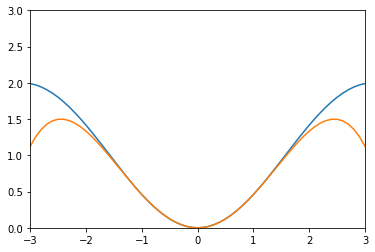

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np

x = np.arange(-9,9.1,0.1)   # start,stop,step

# True solution
y = 1-np.cos(x)

# Taylor series (2nd order) approximation
def rcos_approx(x):
    return x**2/2 - x**4/math.factorial(4)

z = [rcos_approx(i) for i in x]

plt.plot(x, y)
plt.plot(x, z)
plt.xlim([-3, 3])
plt.ylim([0, 3])

Adding higher order terms will give better approximation. Here is a simple code to show the effect.

In [3]:
# Approximation of cos(x)
from ipywidgets import interactive
import ipywidgets as widgets

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import math
import numpy as np

# Define 1-cos(x)
def rcosx(n):
    xmin = -3.0
    xmax = 3.1
    # Numpy arange to generate x
    x = np.arange(xmin, xmax,0.1)
    # List comprehension
    y = [1-math.cos(i) for i in x]

    # Plot exact solution
    plt.plot(x, y)
    
    # Create approximate solution of 1-cos(x)
    def approx_rcosx(x, n):
        rcos_approx = 1
        for i in range(n):
            coef = (-1)**i
            num = x**(2*i)
            denom = math.factorial(2*i)
            rcos_approx -= ( coef ) * ( (num)/(denom) )
        return rcos_approx

    z = [approx_rcosx(i, n) for i in x]

    # Plot approximate solution
    plt.plot(x, z, linewidth=2.0, color="orange")
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.xlabel("x")
    plt.ylabel("cos(x)")
    plt.show()
    
interactive_plot = widgets.interactive(rcosx, n=widgets.IntSlider(min=1, max=6, step=1, value=1))
interactive_plot


interactive(children=(IntSlider(value=1, description='n', max=6, min=1), Output()), _dom_classes=('widget-inte…

# Solving a non-linear equation by Newton Raphson method

Let's go back to the sliding block problem.

The force equlibrium equation will give the following solution for F. It is a nonlinear function of $\theta$

$$
F = \frac{\mu W}{\cos \theta + \mu \sin \theta} = \frac{\mu mg}{\cos \theta + \mu \sin \theta}
$$

Given F=17.5kN, W=25kN and 𝜇 =0.75, what is 𝜃 ?

Let's make a new function 

$$
G(\theta) = \frac{\mu mg}{\cos \theta + \mu \sin \theta} - 17.5
$$

The goal is to find $\theta$ that makes G($\theta$)=0. We will use the Newton Raphson method to find the solution numerically.

# Newton Raphson Method

The general form of Taylor series is given by the following equation.

$$
P(x) = f(a) + \frac{df(a)}{dx}\frac{(x-a)^1}{1!} + \frac{d^2f(a)}{dx^2}\frac{(x-a)^2}{2!} + \cdots
$$

If x = $\theta_{n+1}$ = $\theta_n$ + $\epsilon_n$ and a = $\theta_n$, then G($\theta$)=0 can be approximately as follows.

$$
G(\theta_{n+1}) = G(\theta_n + \epsilon_n) = 0 = G(\theta_n) + \frac{dG(\theta_n)}{d\theta}\frac{(\epsilon_n)^1}{1!} + \frac{d^2G(\theta_n)}{d\theta^2}\frac{(\epsilon_n)^2}{2!} + \cdots
$$ 

By only using the first derivative term,

$$
G(\theta_n + \epsilon_n) = 0 \approx G(\theta_n)+ \frac{dG(\theta_n)}{d\theta}\epsilon_n
$$

$$
\epsilon_n = - \frac{G(\theta_n)}{dG(\theta_n)/d\theta}
$$

Hence 

$$
\theta_{n+1} = \theta_n + \epsilon_n = \theta_n - \frac{G(\theta_n)}{dG(\theta_n)/d\theta}
$$

If the gradient dG($\theta$)/dx is known, then the above equation can be used iteratively from an initial guess $\theta_0$ to find $\theta$ that satisfies G($\theta$)=0. The iteration can stop when $|\epsilon_n|$ becomes smaller than the predefined tolarance. 

The first derivate of G($\theta$) is given as follpws.

$$
dG(\theta)/d(\theta) = \frac{\mu mg (\sin \theta - \mu \cos \theta)}{(\cos \theta + \mu \sin \theta)^2}
$$

Taylor's series is used for the cosin and sin functions.

$$
\cos(\theta) \approx cos(0) - cos(0)\frac{\theta^2}{2!} + cos(0)\frac{\theta^4}{4!} + \cdots
$$

$$
\sin(\theta) \approx cos(0)\frac{\theta}{1!} - cos(0)\frac{\theta^3}{3!} + \cdots
$$

In [35]:
import matplotlib.pyplot as plt
import numpy as np

pi=3.141592653589793

# The approximate cosine function

def approx_cosx(x):
        cos_approx = 0
        for i in range(n0):
            coef = (-1)**i
            num = x**(2*i)
            denom = math.factorial(2*i)
            cos_approx += ( coef ) * ( (num)/(denom) )
        return cos_approx

# The approximate sine function

def approx_sinx(x):
        sin_approx = 0
        for i in range(n0):
            coef = (-1)**(i+1)
            num = x**(2*i+1)
            denom = math.factorial(2*i+1)
            sin_approx -= ( coef ) * ( (num)/(denom) )
        return sin_approx

# Define G function

def Gfn(x):
    return mu*Weight/(approx_cosx(x)+mu*approx_sinx(x))-17.5

# Define dG/dtheta function

def dGfn(x):
    return mu*Weight*(approx_sinx(x)-mu*approx_cosx(x))/(approx_cosx(x)+mu*approx_sinx(x))**2
 
# Function to find the root 
def newton_raphson(x): 
        for i in range(10000):
            h = Gfn(x) / dGfn(x) 
            # x(i+1) = x(i) - f(x) / f'(x) 
            x = x - h
            if abs(h) < 0.001:    
                return x,i
             
# Initial values assumed 
x0 = (60/180)*pi
n0 = 6
mu = 0.75
Weight = 25

# Force
final_force = Gfn(newton_raphson(x0)[0]) + 17.5

# Absolute error          

error = final_force - 17.5

# Relative error
relative_error = abs(error / final_force) * 100

print('After', newton_raphson(x0)[1], 'iterations the angle is {:.6f} deg, \n \
        which gives a force of {:.10f} kN, \n \
        and an absolute error of {:.10E}, \n \
        and a relative error of {:.10E} %.'.format(newton_raphson(x0)[0]*180/pi, final_force , error, relative_error))

After 3 iterations the angle is 67.872615 deg, 
         which gives a force of 17.5000000002 kN, 
         and an absolute error of 1.5701928646E-10, 
         and a relative error of 8.9725306549E-10 %.
